In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)


In [2]:
from src.preprocessing import merge_ip_country
from src.feature_engineering import (
    add_time_features,
    add_transaction_velocity
)


In [3]:
import pandas as pd
from src.preprocessing import (
    load_data,
    clean_fraud_data,
    prepare_ip_data
)

fraud_path = "../data/raw/Fraud_Data.csv"
ip_path = "../data/raw/IpAddress_to_Country.csv"

fraud_df, ip_df = load_data(fraud_path, ip_path)
fraud_df = clean_fraud_data(fraud_df)
ip_df = prepare_ip_data(ip_df)


In [4]:
fraud_geo = merge_ip_country(fraud_df, ip_df)
fraud_geo[['country', 'class']].head()


,country,class
0,Germany,0
1,Germany,0
2,Germany,0
3,Germany,0
4,Germany,0


In [5]:
country_fraud = (
    fraud_geo.groupby('country')['class']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)



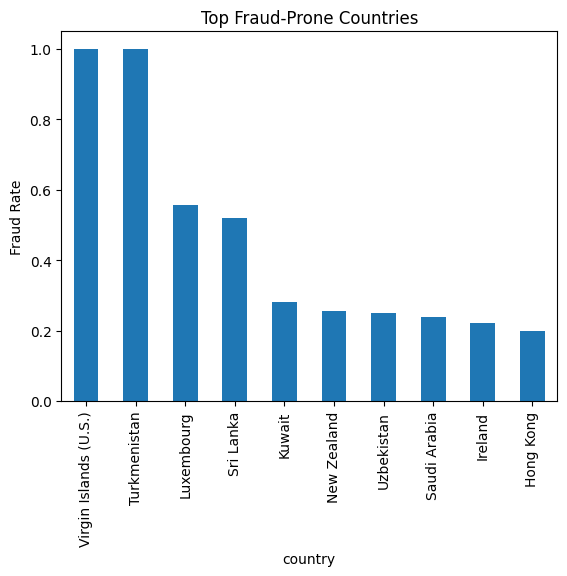

In [6]:
import matplotlib.pyplot as plt

if country_fraud.empty:
    print("No country fraud data available")
else:
    country_fraud.plot(kind='bar')
    plt.title("Top Fraud-Prone Countries")
    plt.ylabel("Fraud Rate")
    plt.show()


In [7]:
print("fraud_geo shape:", fraud_geo.shape)
print("country column exists:", "country" in fraud_geo.columns)
print("Non-null countries:", fraud_geo['country'].notna().sum())


fraud_geo shape: (111325, 15)
country column exists: True
Non-null countries: 111325


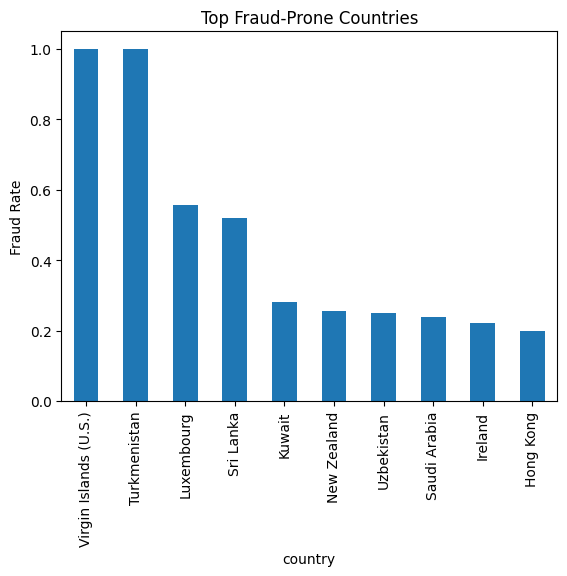

In [8]:
country_fraud.plot(kind='bar')
plt.title("Top Fraud-Prone Countries")
plt.ylabel("Fraud Rate")
plt.show()

In [9]:
fraud_geo = add_time_features(fraud_geo)
fraud_geo = add_transaction_velocity(fraud_geo)

fraud_geo[['user_id', 'purchase_time', 'tx_count_24h']].head(10)




d:\fraud-detection\src\feature_engineering.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .rolling('24H', on='purchase_time')['purchase_time']
d:\fraud-detection\src\feature_engineering.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.groupby('user_id')


,user_id,purchase_time,tx_count_24h
0,2,2015-02-21 10:03:37,1.0
1,4,2015-09-26 21:32:16,1.0
2,8,2015-08-13 11:53:07,1.0
3,12,2015-03-04 20:56:37,1.0
4,16,2015-03-12 12:46:23,1.0
5,33,2015-10-28 18:12:41,1.0
6,39,2015-01-08 18:13:26,1.0
7,41,2015-03-23 10:10:08,1.0
8,48,2015-07-30 10:51:47,1.0
9,57,2015-09-05 00:42:42,1.0


In [10]:
fraud_geo.to_csv(
    "../data/processed/fraud_processed.csv",
    index=False
)
